# RL 训练

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.io
from matplotlib.gridspec import GridSpec
import math

from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import PPO 
from stable_baselines3 import DQN

# 导入 BaseCallback
from stable_baselines3.common.callbacks import BaseCallback

import sys
import os

# 将 src 目录添加到模块搜索路径
sys.path.append(os.path.abspath('src'))

# 导入 IEMEnv 类
from src.envs.iseec_lx_v4_mdp_plot import IEMEnv
from src.utils.run_debug_plot import save_data 
from src.utils.run_debug_plot import save_plot_NSM_data
from src.utils.run_debug_plot import save_plot_SSM_data

from src.utils.run_debug_plot import save_future_data
from src.utils.run_debug_plot import save_plot_NSM_future_data
from src.utils.run_debug_plot import save_plot_SSM_future_data

from src.utils.run_debug_plot import plot_episode_reward
from src.utils.run_debug_plot import plot_episode_reward_simple
from src.utils.run_debug_plot import plot_3D_run

定义保存位置参数

> 所有的关键参数都放在最前面

In [ ]:
custom_reward_type = "PB_temperature"
network_name = "Netxxx_no"
rl_model_name = "DQN"
total_timesteps_diy = 1e6

# gamma_diy = 0.99 # 但是是定义在 model 中，

policy_kwargs_diy = "dict_pi_vf_default" # for example: policy_kwargs = dict(activation_fn=th.nn.ReLU,net_arch=[256, 256, dict(pi=[128, 64], vf=[128, 64])])

# 设置保存的日志名字：
log_name = f"iseec_v4_{rl_model_name}_{policy_kwargs_diy}_{int(total_timesteps_diy)}_{custom_reward_type}" # log_name = "iseec_v4_PPO_Net256_6e5_callback"
os.makedirs(f"./logs/{log_name}", exist_ok=True) # # 创建日志目录

# 设置日志保存路径和格式
tmp_path = f"logs/{log_name}"
new_logger = configure(
    tmp_path, 
    ["stdout",     # 终端输出
     "csv",        # CSV文件
     "tensorboard", # Tensorboard格式
     "json"        # JSON格式
    ]
)


Logging to logs/iseec_v4_DQN_dict_pi_vf_default_500000_PB_temperature


In [3]:
log_name

'iseec_v4_DQN_dict_pi_vf_default_500000_PB_temperature'

### 定义环境

In [4]:
env = IEMEnv(reward_type=custom_reward_type)

env_monitor = Monitor(env, f'./logs/{log_name}')

# check 环境
from stable_baselines3.common.env_checker import check_env
check_env(env_monitor)


# print("Action space sample:", env.action_space.sample())
# print("Observation space sample:", env.observation_space.sample())

# type(env.action_space), type(env.observation_space)

[1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863
 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877
 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031
 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045
 2046 

In [5]:
print("Action space sample:", env.action_space.sample())
print("Observation space sample:", env.observation_space.sample())

Action space sample: 0
Observation space sample: [ 0.46746134 -0.47701396 -0.01091962 -0.83348477  0.19433297  0.74701888
  0.57816826 -1.3471869   0.15895929  0.17676578]


### 定义算法

In [6]:
# 定义模型
# model = PPO(
#     "MlpPolicy", 
#     env_monitor, 
#     verbose=1,
#     )



model = DQN(
    "MlpPolicy", 
    env_monitor, 
    verbose=1,
    )

model.set_logger(new_logger) # set the parameter of the logger

print(model.policy)

Using cuda device
Wrapping the env in a DummyVecEnv.


c:\Users\peter\.conda\envs\torch_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DQNPolicy(
  (q_net): QNetwork(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (q_net): Sequential(
      (0): Linear(in_features=10, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=4, bias=True)
    )
  )
  (q_net_target): QNetwork(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (q_net): Sequential(
      (0): Linear(in_features=10, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=4, bias=True)
    )
  )
)


### 模型训练

Episode 1 finished with reward: -105.88
Moving average (last 1 episodes): -105.88 ± 0.00
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84       |
|    ep_rew_mean      | -106     |
|    exploration_rate | 0.998    |
| time/               |          |
|    episodes         | 1        |
|    fps              | 265      |
|    time_elapsed     | 0        |
|    total_timesteps  | 84       |
----------------------------------
Episode 2 finished with reward: -103.81
Moving average (last 2 episodes): -104.84 ± 1.03
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84       |
|    ep_rew_mean      | -105     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 2        |
|    fps              | 247      |
|    time_elapsed     | 0        |
|    total_timesteps  | 168      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss        

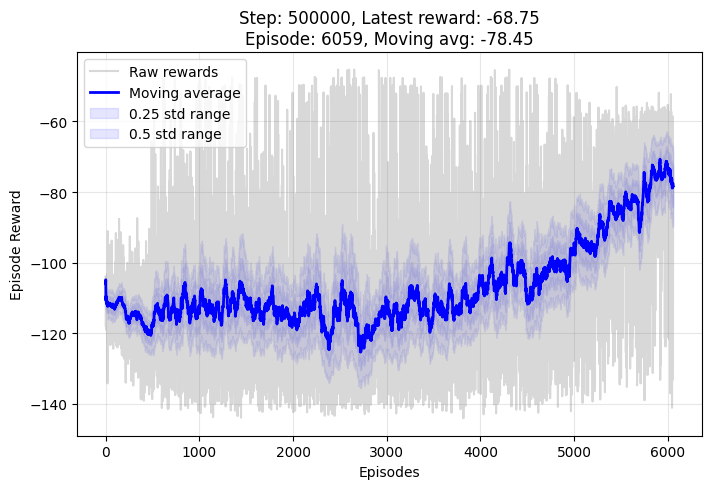

In [7]:

def plot_callback_reward(metrics):
    """绘制训练过程中的奖励曲线
    
    Args:
        metrics (dict): 包含训练指标的字典，需要包含以下键：
            - rewards: 原始奖励列表
            - moving_avg_rewards: 移动平均奖励列表
            - moving_std_rewards: 移动标准差列表
            - episodes: 总回合数
            - step_idx: 当前步数
    """
    plt.figure(figsize=(20, 5))
    
    # 创建主图
    plt.subplot(131)
    plt.title(f'Step: {metrics["step_idx"]}, Latest reward: {metrics["rewards"][-1]:.2f}\n'
              f'Episode: {metrics["episodes"]}, Moving avg: {metrics["moving_avg_rewards"][-1]:.2f}')
    
    # 绘制原始奖励
    episodes = range(len(metrics["rewards"]))
    plt.plot(episodes, metrics["rewards"], 
             label='Raw rewards', color='gray', alpha=0.3)
    
    # 绘制移动平均
    plt.plot(episodes, metrics["moving_avg_rewards"],
             label='Moving average', color='blue', linewidth=2)
    
    # 添加标准差区域
    moving_avg = np.array(metrics["moving_avg_rewards"])
    moving_std = np.array(metrics["moving_std_rewards"])
    
    # 0.25倍标准差范围
    plt.fill_between(episodes,
                    moving_avg - 0.25 * moving_std,
                    moving_avg + 0.25 * moving_std,
                    color='b', alpha=0.1,
                    label='0.25 std range')
    
    # 0.5倍标准差范围
    plt.fill_between(episodes,
                    moving_avg - 0.5 * moving_std,
                    moving_avg + 0.5 * moving_std,
                    color='b', alpha=0.1,
                    label='0.5 std range')
    
    # 设置坐标轴和标签
    plt.xlabel('Episodes')
    plt.ylabel('Episode Reward')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


class TrainingMonitorCallback(BaseCallback):
    def __init__(self, verbose=1, window_size=50):
        super().__init__(verbose)
        self.window_size = window_size
        # Initialize data dictionary to store metrics
        self.data = {
            "rewards": [],
            "moving_avg_rewards": [],
            "moving_std_rewards": [],
            "episodes": 0,
            "step_idx": 0
        }
        self.episode_rewards = 0
        
    def _on_step(self):
        # Accumulate rewards for current episode
        reward = self.locals.get('rewards')[0]
        self.episode_rewards += reward
        self.data["step_idx"] += 1
        
        # When episode ends, update all metrics
        if self.locals.get('dones')[0]:
            # Store raw reward
            self.data["rewards"].append(self.episode_rewards)
            
            # Calculate moving average and std
            recent_rewards = self.data["rewards"][-self.window_size:]
            moving_avg = np.mean(recent_rewards)
            moving_std = np.std(recent_rewards) if len(recent_rewards) > 1 else 0
            
            # Store calculated metrics
            self.data["moving_avg_rewards"].append(moving_avg)
            self.data["moving_std_rewards"].append(moving_std)
            self.data["episodes"] += 1
            
            # Print progress
            print(f"Episode {self.data['episodes']} finished with reward: {self.episode_rewards:.2f}")
            print(f"Moving average (last {len(recent_rewards)} episodes): {moving_avg:.2f} ± {moving_std:.2f}")
            
            # Reset episode rewards
            self.episode_rewards = 0
            
        return True
    
    def get_metrics(self):
        """Return the collected metrics"""
        return self.data
# Create callback with custom window size
callback = TrainingMonitorCallback(window_size=50)

# Train the model
model.learn(
    total_timesteps=int(total_timesteps_diy),
    callback=callback,
    log_interval=1
)

# After training, get metrics for plotting
metrics = callback.get_metrics()

# Plot rewards using the plot_callback_reward function
plot_callback_reward(metrics)

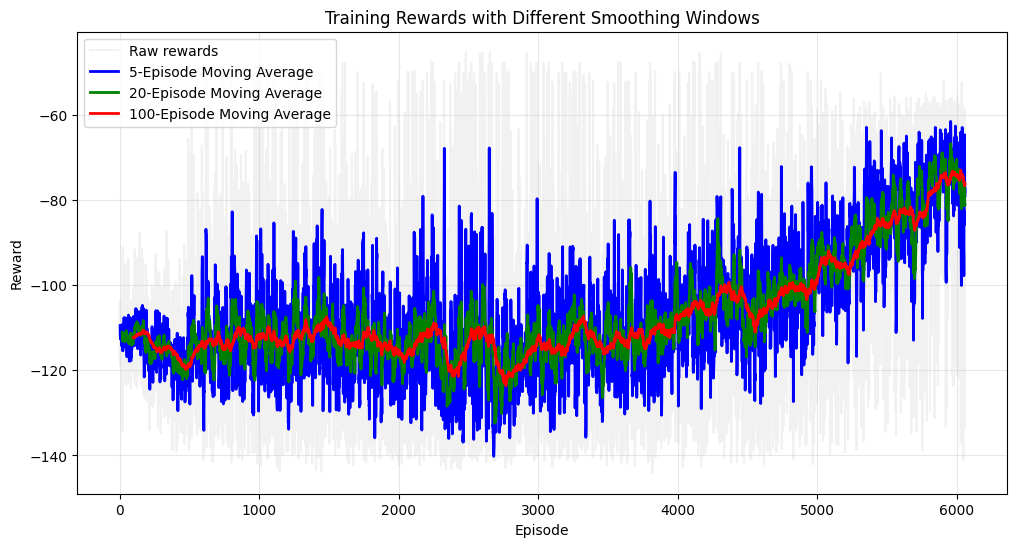

In [ ]:
def plot_smooth_rewards(rewards, window_sizes=[5, 20, 100]):
    """
    绘制平滑的奖励曲线
    Args:
        rewards: 奖励列表
        window_sizes: 移动平均窗口大小列表
    """
    plt.figure(figsize=(12, 6))
    
    # 绘制原始奖励
    plt.plot(rewards, 'lightgray', alpha=0.3, label='Raw rewards')
    
    # 绘制不同窗口大小的移动平均
    colors = ['blue', 'green', 'red']
    for window, color in zip(window_sizes, colors):
        if len(rewards) >= window:
            # 计算移动平均
            smooth_rewards = np.convolve(rewards, 
                                      np.ones(window)/window, 
                                      mode='valid')
            plt.plot(range(window-1, len(rewards)), 
                    smooth_rewards, 
                    color=color, 
                    label=f'{window}-Episode Moving Average',
                    linewidth=2)
    
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Training Rewards with Different Smoothing Windows')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()


# 绘制平滑奖励曲线
plot_smooth_rewards(metrics["rewards"])



notes: 如果要训练过程中查看模型，通过 tensorboard 查看

In [9]:
# 模型保存
model.save(f"./model/{log_name}")

### 评估模型训练结果

> 利用 evaulate policy 函数评估

# 加载训练好的 RL 模型

In [10]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(
    model, 
    model.get_env(), 
    deterministic=True,
    render=True,
    n_eval_episodes=10)


c:\Users\peter\.conda\envs\torch_env\lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


In [11]:
print(mean_reward)
print(std_reward)

-122.041544
0.0


In [12]:
del model
# model = PPO.load(f"./model/{log_name}", env=env_monitor)
model = DQN.load(f"./model/{log_name}", env=env_monitor)

Wrapping the env in a DummyVecEnv.


### 结果展示

#### 纯净展示版本

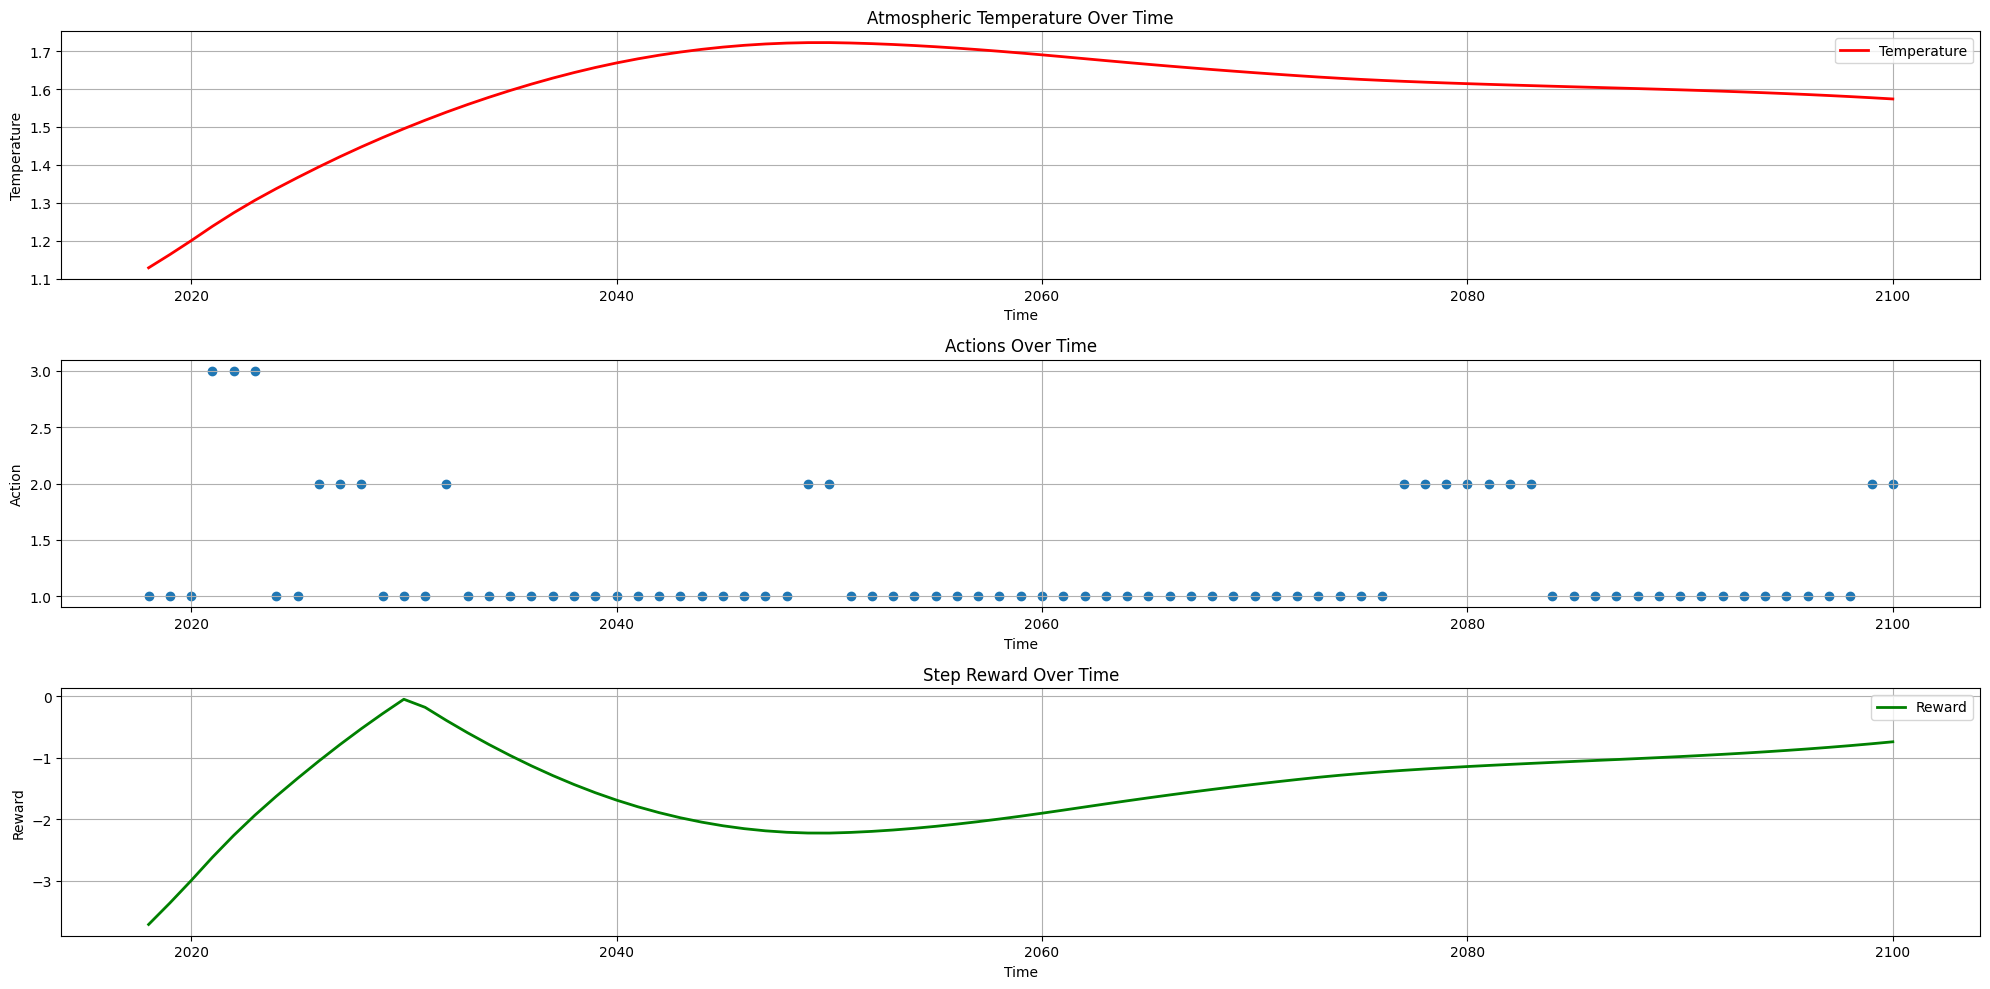

RuntimeError: Tried to step environment that needs reset

In [13]:
# 运行中绘制的图

episodes = 2 # 结果展示，只有一个 episode 部分
max_steps = 250 # 注意内容容易与训练时的 max_steps 混淆

for ep in range(episodes):
    obs, _ = env_monitor.reset() # 必须的，每次重现一次
    episode_reward = 0
    done = False
     
    for i in range(max_steps):
        # action = env_monitor.action_space.sample()
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _, info = env_monitor.step(action)
        
        print(f"Step {i} - Action: {action} - Reward: {reward} - Done: {done}")
        # print(f"Info: {info['state_values']['T_a']}")
        
        # 每10步更新一次图像
        if ep % 10 == 0:
            env_monitor.render()
            # plt.pause(0.01)
        
        episode_reward += reward
    print(f"Episode {ep} finished with reward{reward}")
    # 打印 obs 的第一维 T_a 的值
    print(f"Final T_a: {obs[0]}")

### 保存整体运行结果

In [1]:
env_test = IEMEnv(reward_type=custom_reward_type)

NameError: name 'IEMEnv' is not defined

In [ ]:

# 运行中绘制的图




episodes = 3 # 结果展示，只有一个 episode 部分
max_steps = 250

# all_episode_rewards = [] # 记录所有 episode 里面的

for ep in range(episodes):
    
    ##################################
    # 记录所需数组：每次 episode 重置
    total_action = []
    total_state = []
    total_reward = []
    total_done = []
    ##################################
    # 记录每个 episode 的 reward
    episode_reward = 0
    ##################################
    
    obs, _ = env_test.reset() # 必须的，每次重现一次
    done = False
    
    for i in range(max_steps):
        # action = env_monitor.action_space.sample()
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _, info = env_test.step(action)
        
        print(f"Step {i} - Action: {action} - Reward: {reward} - Done: {done}")
        print(f"Info: {info['state_values']['T_a']}")
        
        ##################################
        # 添加转换的部分
        action_number, action_name = IEMEnv.action2number_env(action)
        total_action.append(action_number)
        total_state.append(obs)
        total_reward.append(reward)
        total_done.append(done)
        ##################################
        # 记录每个 episode 的 reward
        episode_reward += reward # TODO：可以放在内容记录 step 部分
        ################################## 
        
        if done:
            print(f"Episode {ep} finished at step {i}")
            break
        
        # # 每10步更新一次图像
        # if ep % 10 == 0:
        #     env_monitor.render()
        #     # plt.pause(0.01)
    
    # all_episode_rewards.append(episode_reward)
    
    env_test.append_data_reward(episode_reward)
    
    save_future_data(env=env_test,custom_reward_type=custom_reward_type,rl_model_name=rl_model_name,network_name=policy_kwargs_diy,episode=ep,total_action=total_action,total_state=total_state,total_reward=total_reward,total_done=total_done,total_timesteps_name=total_timesteps_diy)

    save_plot_NSM_future_data(env_test, custom_reward_type, rl_model_name, policy_kwargs_diy, ep, total_action, total_state, total_timesteps_diy)
    
    save_plot_SSM_future_data(env_test, custom_reward_type, rl_model_name, policy_kwargs_diy, ep, total_action, total_state, total_timesteps_diy)
    
    # plot_3D_run(env_test, custom_reward_type, rl_model_name, policy_kwargs_diy, ep, total_action, total_state)
    
    
    print(f"Episode {ep} finished with reward{episode_reward}")
    
    
plot_data = env_test.get_variables()
plot_episode_reward(plot_data)

    
    

主要针对可视化显示部分操作

In [ ]:
# 绘制只展示一次 episode 结果

# env_test

for episode in range(1):
    obs, _ = env_test.reset()
    
    done = False
    
    for i in range(251):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _, info = env_test.step(action)
        
        print(f"Step {i} - Action: {action} - Reward: {reward} - Done: {done}")
        
        if done:
            print(f"Episode {episode} finished at step {i}")
            break

        


# 保存运行结果